<a href="https://colab.research.google.com/github/benji555-create/Data-Science/blob/main/Unit7ExercisesSF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fitting Curves: Concepts

What you'll do:

- Answer questions about what a GP is, and its relationship to GLMs and splines.
- Practice applying one of: polynomial modeling, b splines, or GPs
- You'll get a chance to read about and try to comprehend a more standard implementation of a GP.

Have fun!

**Task1**:

Why would you ever want to include a polynomial element in a model you built? What's the benefit of using polynomials to model?

Polynomials in models can make it more complex, using non-linear models, which can increase complexity in models and cover more diverse data sets. Polynomials can also cause overfitting, as covered by last exercises.

**Task2**:

Why would you ever NOT want to include a polynomial element in a model you built?

Polynomials as I said can cuase overfitting, which is bad for models as it creates poor generalized data. Overcomplicated models are also bad, as they can be hard to read.

**Task3**:

What's the point of using b splines?

Using b splines can improvethe flexibility and smoothness of a model and can fit complex patterns in the data using polynomials, while avoiding the issue of overfitting.

**Task4**:

Describe what a Gaussian Process is, in your own words. *Don't worry about being correct, just try to explain it to yourself*. I will not grade this question for accuracy.

A gaussian process is used to determine any similarities from data that seems like they might fit together, but it may not be obvious. The gaussian process will help make it easier giving multiple possible outcomes.

**Task5**:

Refit a model to the howell data, using one of the following: polynomial model, b splines, or GPs.
Plot the posterior predictive check on a scatter plot

You only need to use one . Remember, the simpler the model is, the better (usually).

Hint: If you use a polynomial or bspline, try a disdributional model


In [ ]:
!pip install git+https://github.com/pydata/xarray.git
!pip install bambi
import numpy as np
import pandas as pd
import arviz as az
import matplotlib.pyplot as plt
import xarray as xr
import bambi as bmb
howell = pd.read_csv('https://raw.githubusercontent.com/thedarredondo/data-science-fundamentals/refs/heads/main/Data/howell.csv')

  Cloning https://github.com/pydata/xarray.git to /tmp/pip-req-build-x8rcruqe
  Running command git clone --filter=blob:none --quiet https://github.com/pydata/xarray.git /tmp/pip-req-build-x8rcruqe
  Resolved https://github.com/pydata/xarray.git to commit 4bbab48cacf94ff285475bd7b7abeea3b2ea888f
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for xarray: filename=xarray-2025.1.3.dev16+g4bbab48c-py3-none-any.whl size=1255523 sha256=d34beb5b1bd6cb2d0cfd0a38d36dbfc66843adc72e46929f9d61b6210cb5b6f3
  Stored in directory: /tmp/pip-ephem-wheel-cache-rczr23_h/wheels/15/f9/46/ac58ec95d7761bd0b92f54d99c5d132719866f63745c3702ed
Successfully built xarray
  Attempting uninstall: xarray
    Found existing installation: xarray 2025.1.2
    Uninstalling xarray-2025.1.2:
      Successfully uninstalled xarray-2025.1.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.2/109.2 kB 2.4 MB/s eta 0:00:00
   ━

In [ ]:
knots_val = 6
knots = np.linspace(53.975,100, knots_val+2)[1:-1]
model_spline = bmb.Model("weight ~ bs(height, degree=3, knots=knots)", howell, family="negativebinomial")
idata_spline = model_spline.fit()

Output()

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


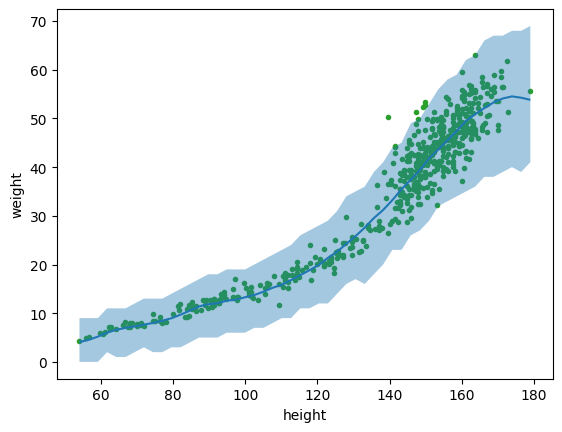

In [ ]:
bmb.interpret.plot_predictions(model_spline, idata_spline, "height", pps=True)
plt.plot(howell.height, howell.weight, "C2.", zorder=-3)

**Task6**:

Read the article on the pymc website about GP implementation on the Mauna Loa CO$_{2}$ data combined with CO$_{2}$ ice core data from the south pole.
[Link here.](https://www.pymc.io/projects/examples/en/latest/gaussian_processes/GP-MaunaLoa2.html)

Write down one thing you learned about GPs from reading the article.

Note: You probably won't understand anything in this article. The main point of this task is to hammer home that good GP implementations are extremely technical.

This article attempts to teach us on using the Gaussian Process to model data with uncertainty. This shows us how to design a GP model and incorporate uncertainty in both the target variable (the CO₂ measurements) and the input variable (uncertain exact dates for time).

**Task7**:

Describe your favorite graph from the article in the previous task. Explain why its your favorite.

I liked the covariance matrix plot. This graph was one I hadn't really seen before and it showed how the model finds the relationships between different data points based on their distance in time. I thought it was interesting because I had never seen it and it's a really strong representation of how the GP can be used.